# RandomForestClassifier

In [12]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features (chemical properties of the wines)
y = wine.target  # Target labels (wine classes)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importances
print("\nFeature Importances:")
print(rf_clf.feature_importances_)


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Feature Importances:
[0.11239774 0.03570276 0.02128206 0.03242488 0.0368407  0.02927859
 0.20229342 0.01351525 0.02356092 0.17120218 0.07089132 0.11156432
 0.13904587]


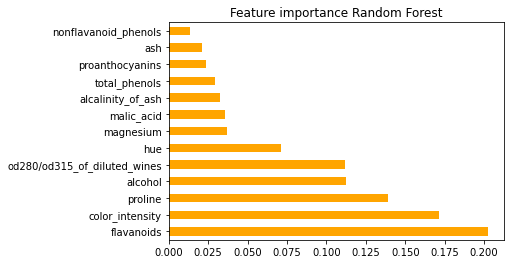

In [15]:
import pandas as pd

importance_rf = pd.Series(rf_clf.feature_importances_, index=wine.feature_names)
importance_rf_sorted = importance_rf.sort_values()
importance_rf_sorted.nlargest(20).plot(kind='barh', color='orange')
plt.title("Feature importance Random Forest")
plt.show()

In [17]:
max_depth = range(1,20)
train_scores = []
test_scores = []
for a in max_depth:
    tree = RandomForestClassifier(random_state=42, max_depth=a)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

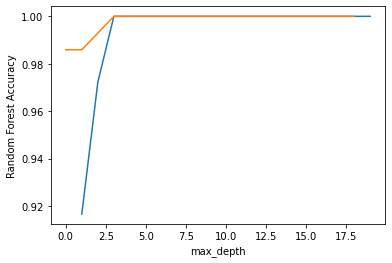

In [18]:
plt.plot(max_depth, test_scores,train_scores)
plt.xlabel('max_depth')
plt.ylabel('Random Forest Accuracy')
plt.show()

# Random forest regressor

In [19]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data  # Features
y = california_housing.target  # Target variable (median house value)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.26
R-squared: 0.80


### Evaluate the Model:

* **Mean Squared Error (MSE):** This is the average squared difference between the actual values and the predicted values. A lower MSE indicates better performance.
* **R-squared:** This metric measures how well the model fits the data. An R-squared value close to 1 indicates a good fit, while a value close to 0 indicates poor performance.